# Boom Bikes - Linear Regression Model
## Steps to overall model building:
 1) Data Understanding and Data Loading
 2) Pre-processing steps
 3) Visualization and EDA
 4) Train and Test Split
 5) Missing Value Operations
 6) Rescaling the features
 7) Feature Selection
 8) Model Building
 9) Evaluation on Test Data


## Step-1 : Data Understanding and Data Loading

In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


In [2]:
# read the dataset
boom = pd.read_csv('C:/Users/DELL-PC/Desktop/Learning/Upgrad/BoomBikes_LinearRegression/day.csv')
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
boom.shape

(730, 16)

In [4]:
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step-2 : Pre-processing steps

In [6]:
# Dropping 2 columns which are not features - instant, dteday, Casual & Registered
boom = boom.drop(['instant','dteday','casual', 'registered'], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Renaming The columns for ease 
boom.rename(columns={'hum':'humidity','cnt':'count','yr':'year','mnth':'month'},inplace=True)
boom.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
#Mapping values of categorical variables from data dictionary
#Encoding Season

season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
boom['season'] = boom['season'].map(season_dict)
boom.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
print(boom.season.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [10]:
#Encoding Month

def ass_month(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })
boom[['month']] = boom[['month']].apply(ass_month)


In [11]:
boom.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<Axes: xlabel='month', ylabel='count'>

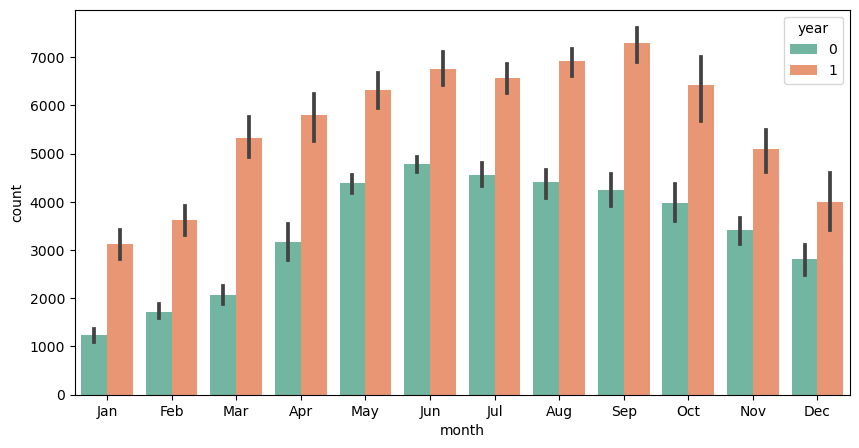

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',hue = 'year', data=boom, palette='Set2')

In [13]:
#Encoding WeekDay

def ass_weekday(x):
    return x.map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

boom[['weekday']] = boom[['weekday']].apply(ass_weekday)

<Axes: xlabel='weekday', ylabel='count'>

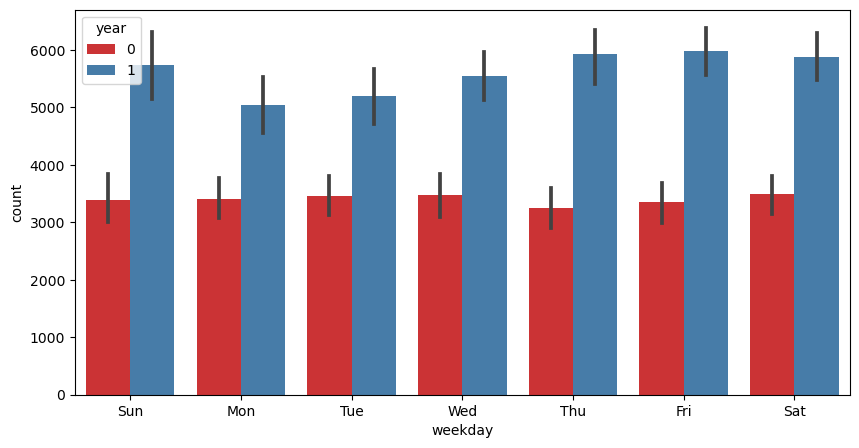

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='weekday',y='count', hue='year', data=boom, palette='Set1')

In [15]:
# Encoding Year

year = {1:2019,0:2018}
boom.yearr=boom.year.map(year)

<Axes: xlabel='year', ylabel='count'>

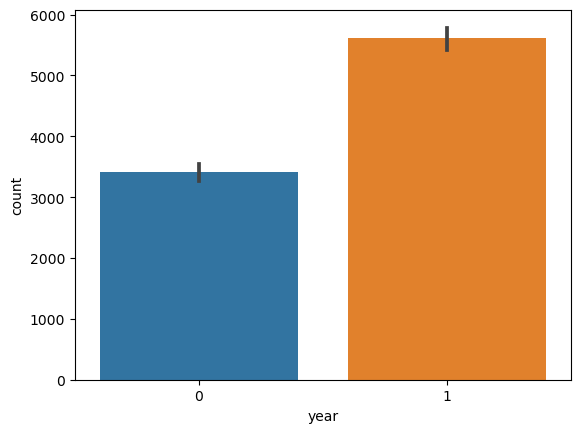

In [16]:
sns.barplot(x='year',y='count',data=boom)

In [17]:
year = {2019:1,2018:0}
boom.yearr=boom.year.map(year)

In [18]:
# Encoding Day

day = {1:'working_day',0:'Holiday'}
boom['workingday'] = boom['workingday'].map(day)

<Axes: xlabel='workingday', ylabel='count'>

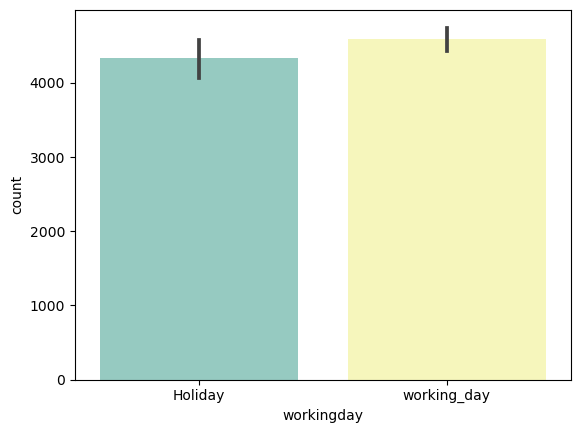

In [19]:
sns.barplot(x='workingday',y='count',data=boom, palette='Set3')

In [20]:
# Encoding Weather

weather_dict = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
boom.weathersit = boom.weathersit.map(weather_dict)
print(boom.weathersit.value_counts())

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64


<Axes: xlabel='weathersit', ylabel='count'>

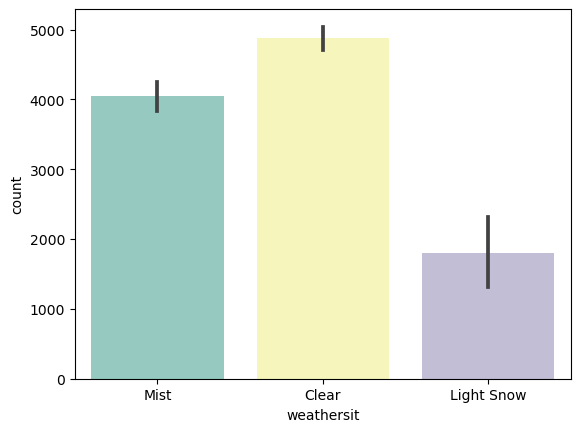

In [21]:
sns.barplot(x='weathersit',y='count',data=boom, palette='Set3')

## Step-3 : Visualization and EDA

In [22]:
# Categorical
boom_categorical = boom.select_dtypes(exclude=['float64','int64','datetime64'])
boom_categorical.head()

,season,month,weekday,workingday,weathersit
0,spring,Jan,Sun,Holiday,Mist
1,spring,Jan,Mon,Holiday,Mist
2,spring,Jan,Tue,working_day,Clear
3,spring,Jan,Wed,working_day,Clear
4,spring,Jan,Thu,working_day,Clear


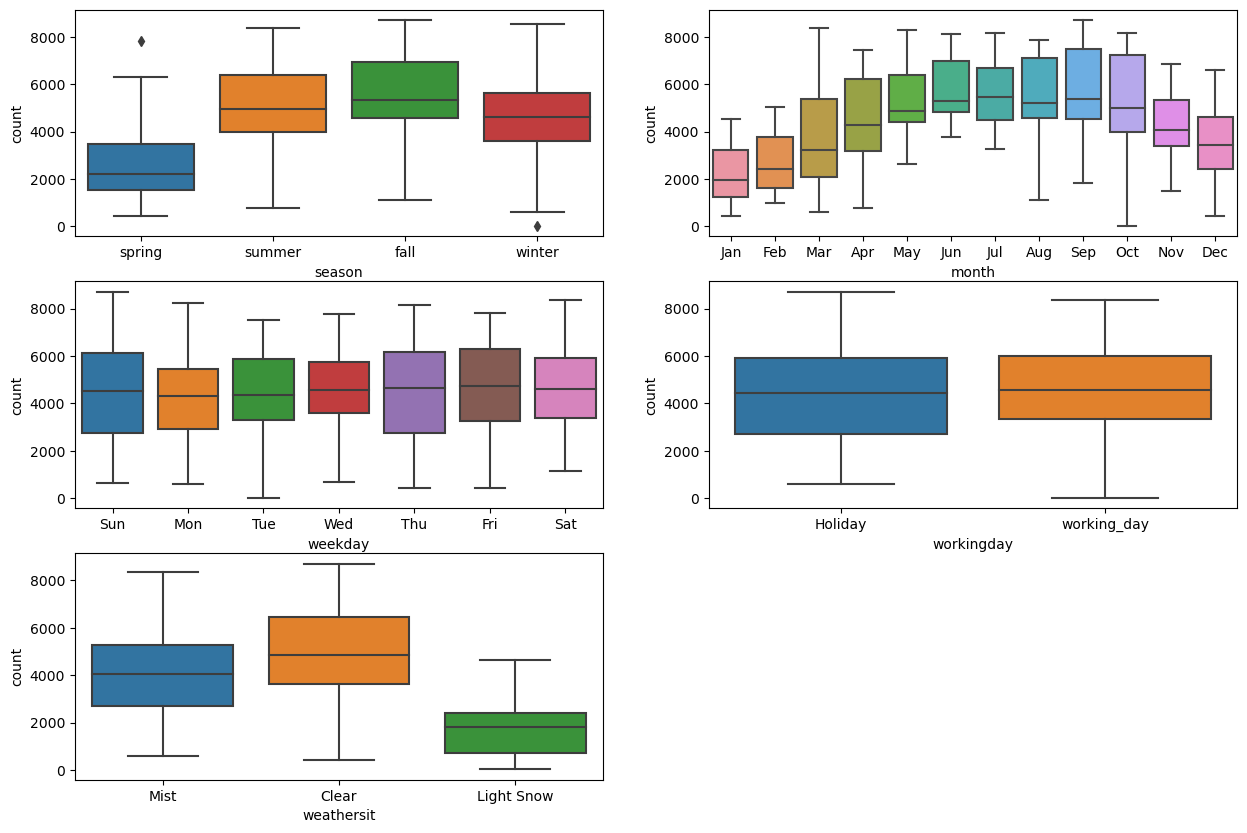

In [23]:
# Visualizing Categorical Variables

plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.boxplot(x='season', y='count',data=boom)

plt.subplot(3,2,2)
sns.boxplot(x='month', y='count',data=boom)

plt.subplot(3,2,3)
sns.boxplot(x='weekday', y='count',data=boom)

plt.subplot(3,2,4)
sns.boxplot(x='workingday', y='count',data=boom)

plt.subplot(3,2,5)
sns.boxplot(x='weathersit', y='count',data=boom)


plt.show();

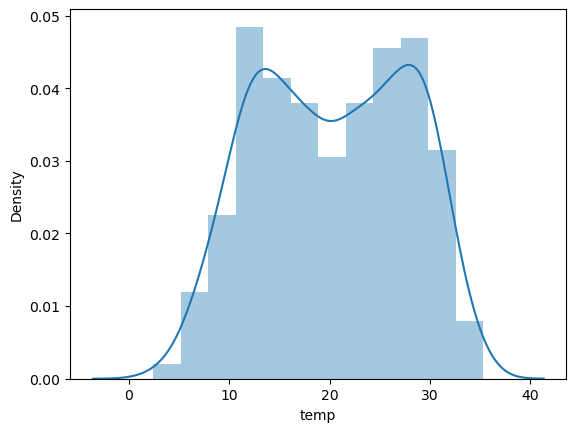

In [24]:
# temp, atemp, hum, windspeed, cnt
sns.distplot(boom.temp)
plt.show()

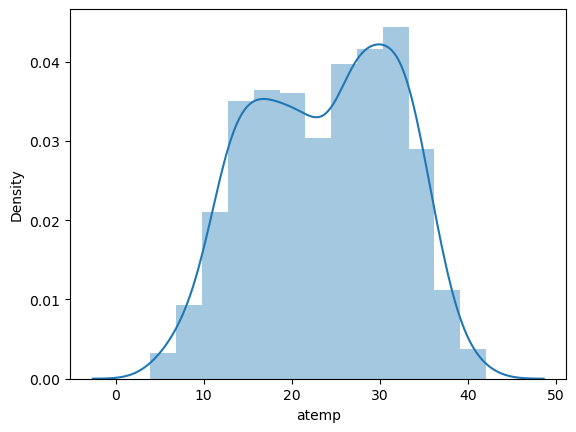

In [25]:
sns.distplot(boom['atemp'])
plt.show();

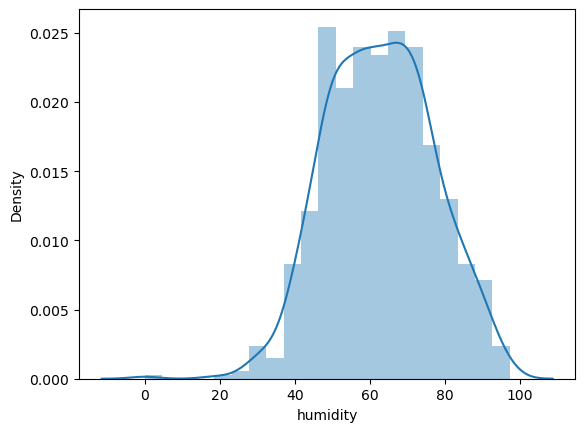

In [26]:
sns.distplot(boom['humidity'])
plt.show();

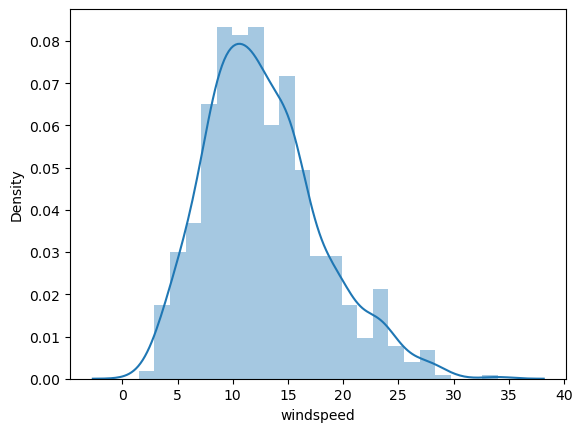

In [27]:
sns.distplot(boom['windspeed'])
plt.show();

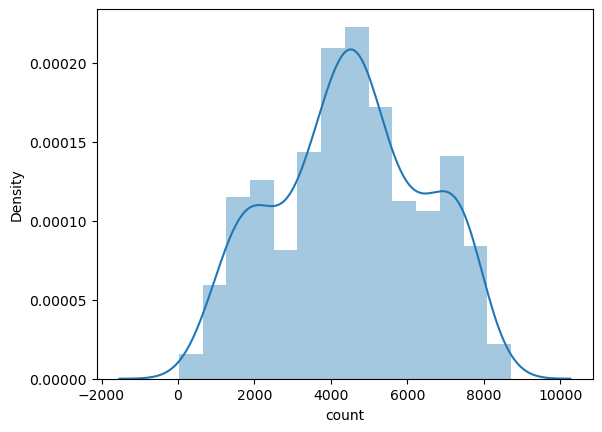

In [28]:
sns.distplot(boom['count'])
plt.show();

In [29]:
# Visualizing Numerical Variables

IntVariableList = ['temp','atemp','humidity','windspeed','count']

for var in IntVariableList:
    boom[var] = boom[var].astype('float')

In [30]:
boom_num = boom.select_dtypes(include=['float64'])

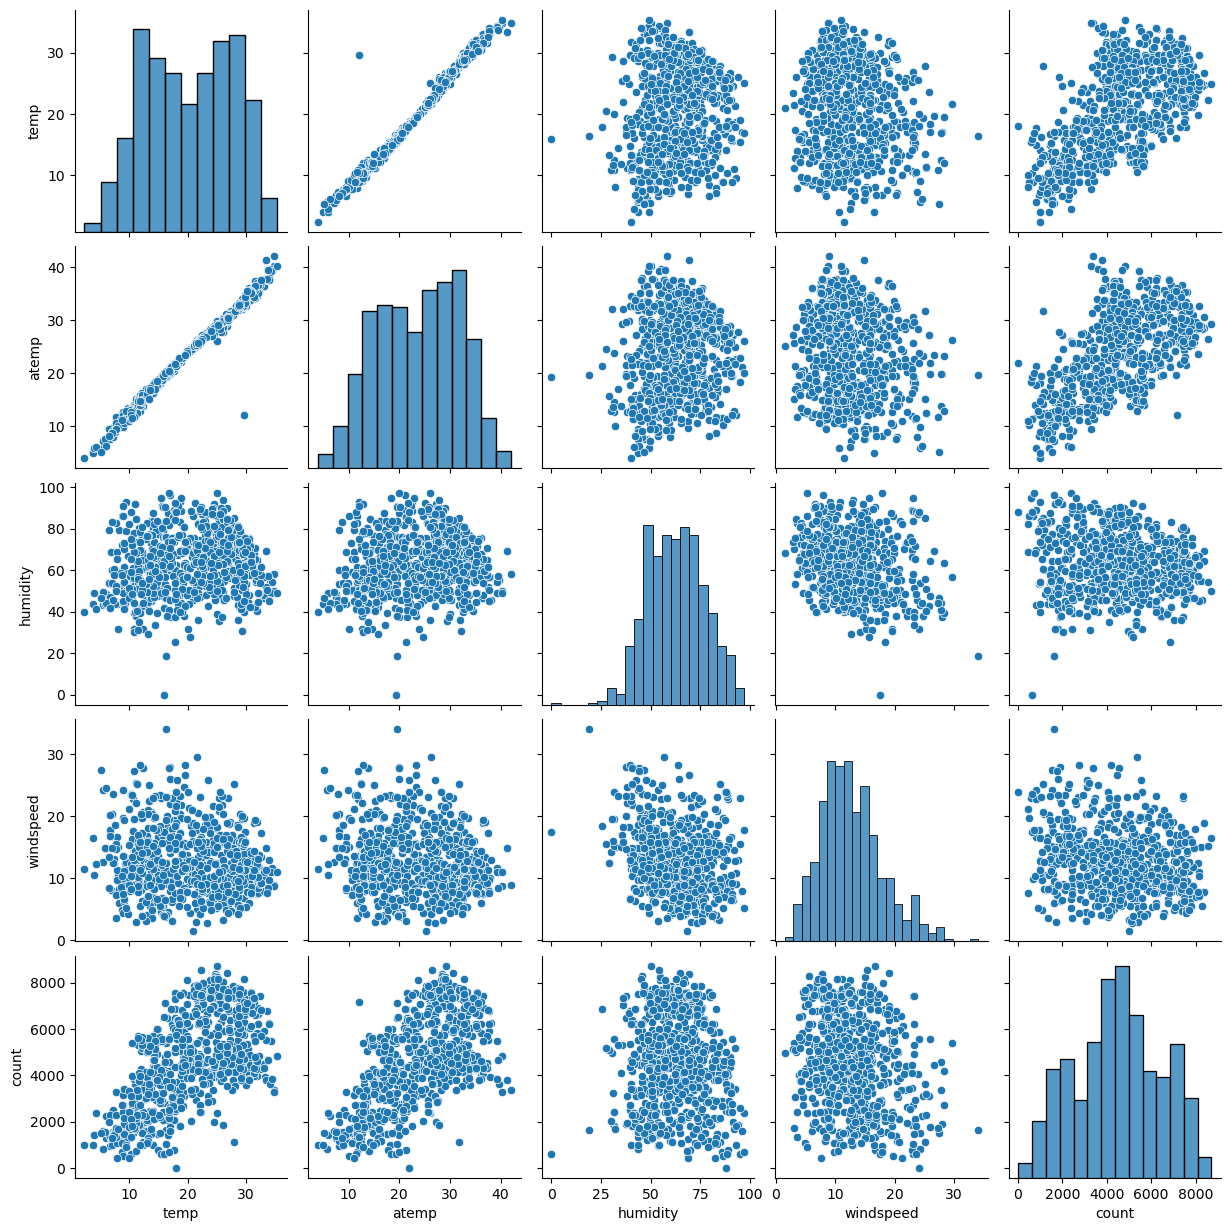

In [31]:
sns.pairplot(boom_num)
plt.show();

## Visualizing the correlation among variables


In [32]:
boom_cor = boom.corr()
boom_cor

,year,holiday,temp,atemp,humidity,windspeed,count
year,1.000000,0.008195,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
temp,0.048789,-0.028764,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.569728,-0.068764,0.627044,0.630685,-0.098543,-0.235132,1.000000


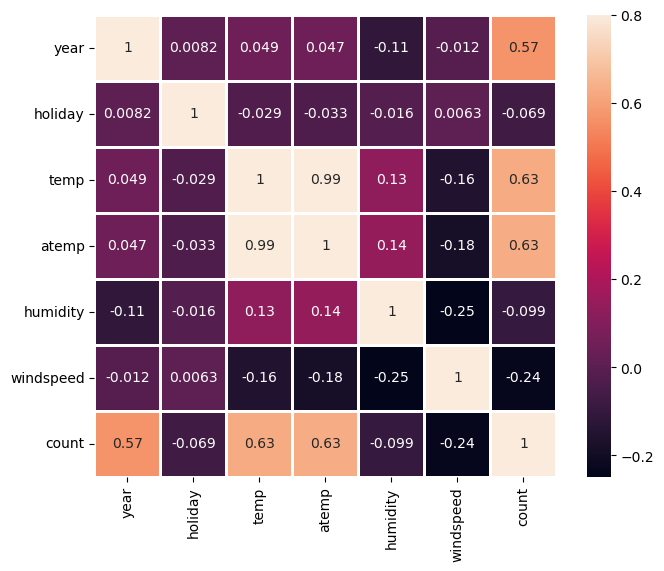

In [33]:
# heatmap

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.heatmap(boom_cor, vmax=0.8, square=True, annot=True,linewidths=2);

* atemp and temp are highly correlated and hence one can be dropped to avoid multicollinearity

In [34]:
boom.drop('atemp',axis=1,inplace=True)
boom.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600.0


## Dealing with Dummy Variables

In [35]:
# use dummies for season, month, weekday , workingday and weathersit.

boom_dummies = pd.get_dummies(boom_categorical, drop_first=True)
boom_dummies.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [36]:
list(boom_categorical.columns)

['season', 'month', 'weekday', 'workingday', 'weathersit']

In [37]:
boom = boom.drop(list(boom_categorical.columns), axis=1)
boom.head()

,year,holiday,temp,humidity,windspeed,count
0,0,0,14.110847,80.5833,10.749882,985.0
1,0,0,14.902598,69.6087,16.652113,801.0
2,0,0,8.050924,43.7273,16.636703,1349.0
3,0,0,8.200000,59.0435,10.739832,1562.0
4,0,0,9.305237,43.6957,12.522300,1600.0


In [38]:
boom = pd.concat([boom,boom_dummies], axis=1)
boom.head()

,year,holiday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,8.050924,43.7273,16.636703,1349.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562.0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600.0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# Step-4 : Train and Test Split using sklearn


In [39]:
# train and test split of data

boom_train, boom_test = train_test_split(boom, train_size=0.7, random_state=100)
print(boom_train.shape)
print(boom_test.shape)


(510, 29)
(220, 29)


# Step-5 : Missing Value Imputation
(skipping for this assignment as there are not missing values)

# Step-6 : Rescaling of Features

## 1)  Min-Max Scaling (Normalization): between 0 and 1
## 2) Standardization (mean=0, sigma=1)

In [40]:
# 1. Initiate an object
scaler = MinMaxScaler()

# 2. Create a list of all num vars
num_vars = ['temp', 'humidity', 'windspeed', 'count']

# fit(): learns min, max
# tranform(): x-x_min/x_max-x_min
# fit_transform(): both fit & transform together

# 3. fit on train data
boom_train[num_vars] = scaler.fit_transform(boom_train[num_vars])
boom_train.head()

,year,holiday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1


In [41]:
#Checking numeric variables(min and max) after scaling
boom_train.describe()

,year,holiday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,...,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.676471,0.029412,0.345098
std,0.500429,0.157763,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,...,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.468282,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obs: All the numeric variables are now mapped between 0 and 1

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

boom_train.corr()

,year,holiday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
year,1.000000,-0.014980,0.108054,-0.084061,-0.000439,0.591433,-0.036320,0.018294,-0.027174,0.054774,...,0.002574,-0.000812,-0.011876,-0.033817,-0.001452,0.053634,-0.000296,0.031808,-6.076399e-02,-0.011388
holiday,-0.014980,1.000000,-0.066405,-0.029224,0.017458,-0.095948,0.053339,-0.063798,0.051582,-0.052728,...,0.043692,-0.066102,-0.024505,-0.069242,-0.070276,0.279279,-0.062897,-0.233863,-2.815377e-02,-0.038895
temp,0.108054,-0.066405,1.000000,0.155252,-0.187281,0.645048,-0.606396,0.126057,-0.234200,0.387176,...,0.207212,-0.017367,0.015642,-0.042608,0.029020,-0.032455,0.048662,0.068326,-3.622709e-02,-0.089452
humidity,-0.084061,-0.029224,0.155252,1.000000,-0.267126,-0.058793,-0.201616,-0.014192,0.173980,0.052949,...,0.152439,0.011915,-0.016457,-0.040858,0.046866,0.022296,0.012087,0.032525,2.449653e-01,0.479436
windspeed,-0.000439,0.017458,-0.187281,-0.267126,1.000000,-0.253038,0.180351,0.110441,-0.090740,-0.111460,...,-0.121930,-0.001499,-0.016023,0.049063,-0.019862,-0.004658,-0.004101,-0.042704,8.677832e-02,-0.029892
count,0.591433,-0.095948,0.645048,-0.058793,-0.253038,1.000000,-0.548987,0.140259,0.025945,0.227578,...,0.201639,-0.063214,0.024805,-0.015998,0.025468,-0.009333,0.030528,0.092019,-2.266784e-01,-0.169715
season_spring,-0.036320,0.053339,-0.606396,-0.201616,0.180351,-0.548987,1.000000,-0.324666,-0.324666,-0.184784,...,-0.167580,0.003276,0.016394,0.022641,-0.008680,-0.009212,-0.030988,-0.037932,-4.455809e-02,0.011613
season_summer,0.018294,-0.063798,0.126057,-0.014192,0.110441,0.140259,-0.324666,1.000000,-0.328125,-0.186753,...,-0.169366,-0.013439,-0.014435,-0.019069,0.037167,-0.000299,0.032932,0.046302,-4.590079e-02,0.043202
season_winter,-0.027174,0.051582,-0.234200,0.173980,-0.090740,0.025945,-0.324666,-0.328125,1.000000,-0.186753,...,-0.018884,0.038486,-0.041700,0.018626,-0.025022,0.037795,-0.020899,-0.060593,1.155434e-01,0.024076
month_Aug,0.054774,-0.052728,0.387176,0.052949,-0.111460,0.227578,-0.184784,-0.186753,-0.186753,1.000000,...,-0.096395,-0.038258,0.035014,0.007536,0.003962,-0.025981,0.011084,0.040575,-5.675323e-02,0.015258


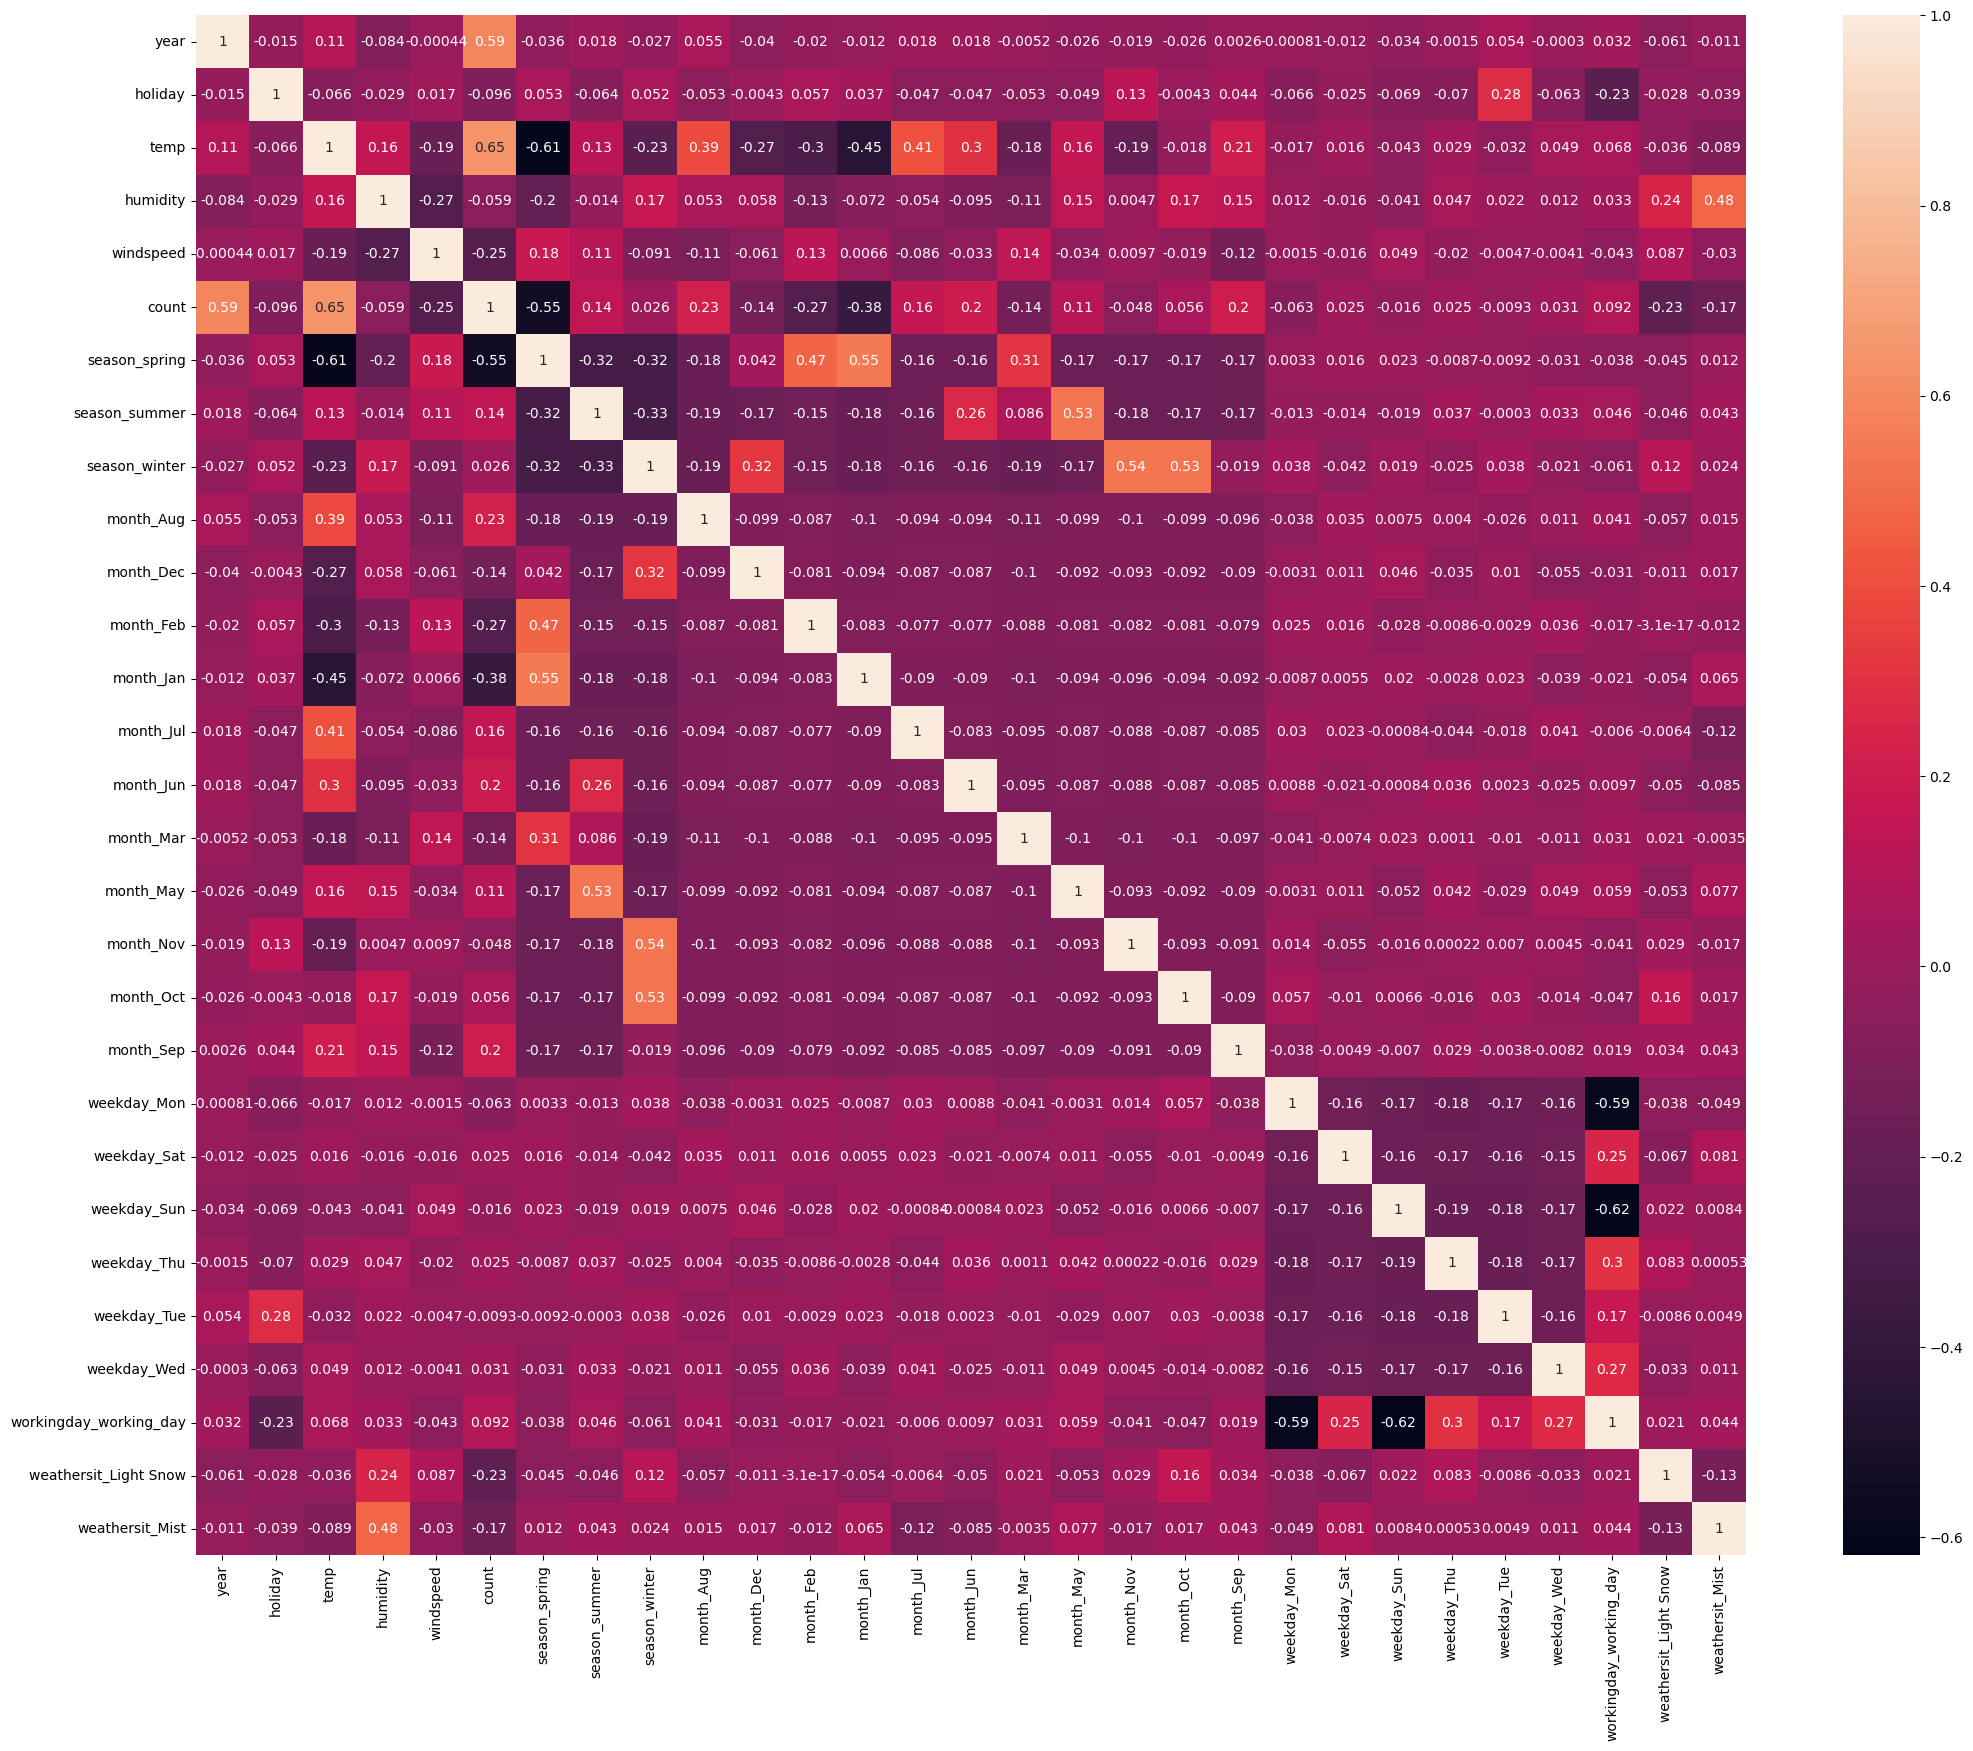

In [43]:
# draw hetmap and see
plt.figure(figsize=(25, 20))
sns.heatmap(boom_train.corr(),annot = True)
plt.show()

**Obs:**

From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

## Training the Model

In [44]:
#Divide the data into X and y

y_train = boom_train.pop('count')
X_train = boom_train
print(X_train.head())
print(y_train.head())

     year  holiday      temp  humidity  windspeed  season_spring  \
576     1        0  0.815169  0.725633   0.264686              0   
426     1        0  0.442393  0.640189   0.255342              1   
728     1        0  0.245101  0.498067   0.663106              1   
482     1        0  0.395666  0.504508   0.188475              0   
111     0        0  0.345824  0.751824   0.380981              0   

     season_summer  season_winter  month_Aug  month_Dec  ...  month_Sep  \
576              0              0          0          0  ...          0   
426              0              0          0          0  ...          0   
728              0              0          0          1  ...          0   
482              1              0          0          0  ...          0   
111              1              0          0          0  ...          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
576            0            0            0            0            0

### RFE (Recursive Feature Elimination)



In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 2),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', False, 2),
 ('month_Jun', False, 2),
 ('month_Mar', False, 2),
 ('month_May', False, 2),
 ('month_Nov', True, 1),
 ('month_Oct', False, 2),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('workingday_working_day', False, 2),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [48]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Dec', 'month_Jan', 'month_Nov',
       'month_Sep', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [49]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          5.38e-188
Time:                        21:05:53   Log-Likelihood:                 509.49
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     495   BIC:                            -925.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

## Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.


In [53]:
X_train_rfe

,const,year,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Dec,month_Jan,month_Nov,month_Sep,weathersit_Light Snow,weathersit_Mist
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,1
79,1.0,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,1


In [54]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.88
2,temp,16.35
4,windspeed,4.72
5,season_spring,4.25
7,season_winter,3.90
6,season_summer,2.50
13,weathersit_Mist,2.32
0,year,2.09
10,month_Nov,1.84
9,month_Jan,1.74


**Obs :**
December is insignificant in presence of other variables due to high p-value and low VIF; can be dropped


In [57]:
#Drop December
X_train_new1 = X_train_rfe.drop(["month_Dec"], axis = 1)

In [58]:
# Rebuilding the model without 'Dec'

X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.06e-188
Time:                        21:08:42   Log-Likelihood:                 507.31
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     496   BIC:                            -927.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [59]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [60]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.09
2,temp,15.45
4,windspeed,4.71
5,season_spring,4.25
7,season_winter,3.63
6,season_summer,2.47
12,weathersit_Mist,2.29
0,year,2.09
8,month_Jan,1.66
9,month_Nov,1.60


In [61]:
#Drop November because of high p-val and low VIF

X_train_new2 = X_train_lm1.drop(["month_Nov"], axis = 1)

In [62]:
# Rebuilding Model once more

X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          4.79e-189
Time:                        21:09:56   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [63]:
#Drop the constant term B0
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.01
2,temp,15.37
4,windspeed,4.65
5,season_spring,4.23
7,season_winter,3.22
6,season_summer,2.47
11,weathersit_Mist,2.28
0,year,2.08
8,month_Jan,1.66
9,month_Sep,1.28


**Obs :** 
'humidity' variable can be dropped as its insignificant by looking at very high VIF



In [65]:
#Drop humidity
X_train_new3 = X_train_lm2.drop(["humidity"], axis = 1)

In [66]:
#Rebuilding the model once more
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.96e-186
Time:                        21:11:17   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [67]:
#Drop the constant
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [68]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.61
2,temp,3.85
4,season_spring,2.63
0,year,2.07
5,season_summer,1.91
6,season_winter,1.63
7,month_Jan,1.60
10,weathersit_Mist,1.56
8,month_Sep,1.23
9,weathersit_Light Snow,1.08


**Obs :** 
"January" variable seems to be insignificant, by looking at p value and low VIF. We can drop it


In [69]:
#Drop the January column
X_train_new4=X_train_lm3.drop(['month_Jan'],axis=1)

In [70]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.47e-186
Time:                        21:12:41   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [71]:
#Drop constant 
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [72]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_Mist,1.55
7,month_Sep,1.23
8,weathersit_Light Snow,1.08
1,holiday,1.04


**Obs :**
Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it


In [73]:
#Drop windspeed
X_train_new5= X_train_lm4.drop(['windspeed'], axis=1)

In [74]:
#Rebuilding the model once more

X_train_lm5=sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.33e-180
Time:                        21:13:48   Log-Likelihood:                 477.90
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     500   BIC:                            -893.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [75]:
#Drop constant
X_train_lm5= X_train_lm5.drop(['const'], axis=1)

In [76]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.89
0,year,2.06
4,season_summer,1.63
8,weathersit_Mist,1.55
5,season_winter,1.43
3,season_spring,1.33
6,month_Sep,1.23
7,weathersit_Light Snow,1.07
1,holiday,1.04


In [77]:
#Drop Summer
X_train_new6=X_train_lm5.drop(['season_summer'], axis=1)

In [78]:
#Rebuilding a model once more

X_train_lm6= sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     278.9
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          4.15e-179
Time:                        21:15:18   Log-Likelihood:                 471.47
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     501   BIC:                            -886.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [79]:
#Drop the constant
X_train_lm6=X_train_lm6.drop(['const'],axis=1)

In [80]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.39
0,year,2.04
7,weathersit_Mist,1.49
4,season_winter,1.29
3,season_spring,1.23
5,month_Sep,1.15
6,weathersit_Light Snow,1.06
1,holiday,1.04


**Obs :**
All the P-values are almost 0.000 and VIF values are < 5 hence we can finalize this model as the trained model

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [81]:
X_train_lm6


,year,holiday,temp,season_spring,season_winter,month_Sep,weathersit_Light Snow,weathersit_Mist
576,1,0,0.815169,0,0,0,0,0
426,1,0,0.442393,1,0,0,0,1
728,1,0,0.245101,1,0,0,0,0
482,1,0,0.395666,0,0,0,0,1
111,0,0,0.345824,0,0,0,0,1
...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0,0,0,0,0
53,0,0,0.202618,1,0,0,0,0
350,0,0,0.248216,0,1,0,0,1
79,0,0,0.462664,0,0,0,0,1


In [82]:
X_train_lm6=sm.add_constant(X_train_lm6)

In [83]:
#y train predicted
y_train_pred = lm6.predict(X_train_lm6)

<Figure size 640x480 with 0 Axes>

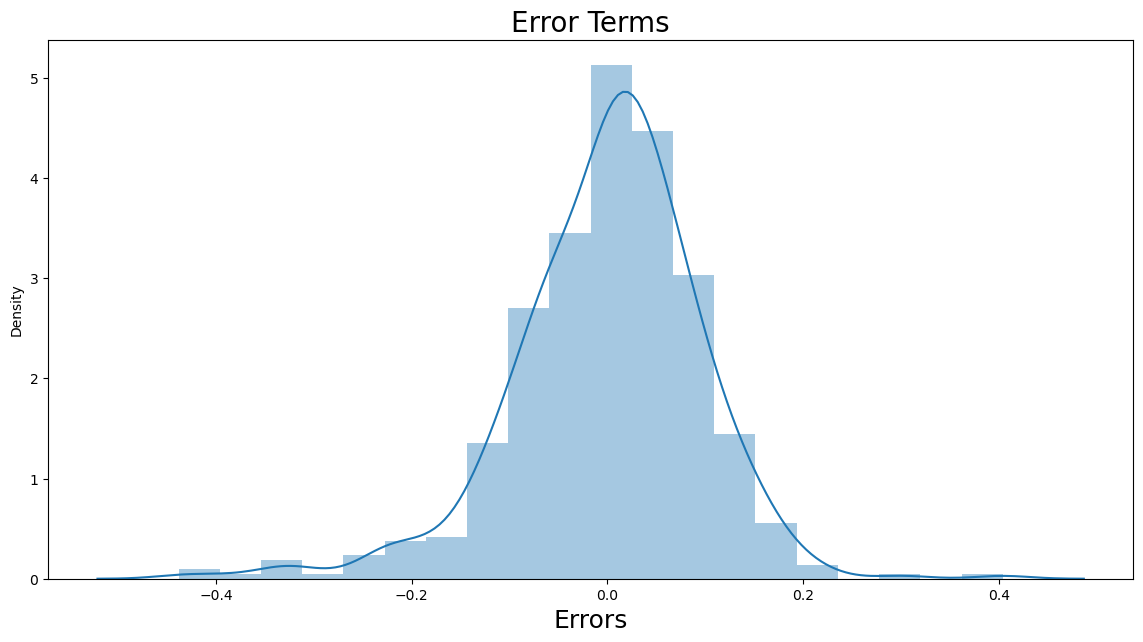

In [85]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

**Obs :** 
We can see Error terms are normally distributed



## Making Predictions

**Applying the scaling on the test sets**



In [88]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
boom_test[num_vars] = scaler.transform(boom_test[num_vars])
boom_test.head()

,year,holiday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
184,0,1,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1,0,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
221,0,0,0.881625,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
# Dividing into X_test and y_test

y_test = boom_test.pop('count')
X_test = boom_test
X_test.describe()

,year,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.700000,0.027273,0.318182
std,0.500809,0.187620,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.459303,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
#Columns
X_train_new5.columns

Index(['year', 'holiday', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'month_Sep', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [91]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,year,holiday,temp,season_spring,season_summer,season_winter,month_Sep,weathersit_Light Snow,weathersit_Mist
184,1.0,0,1,0.831783,0,0,0,0,0,1
535,1.0,1,0,0.901354,0,1,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0


In [92]:
# Make predictions
y_pred = lm5.predict(X_test_new1)

In [93]:
#Finding R-squared and Adjusted R-Squared for Test set

#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8090304806579873

In [94]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.80903048066)*(11-1)/(11-1-1)
print(Adj_r2)

0.7878116451777778


## Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

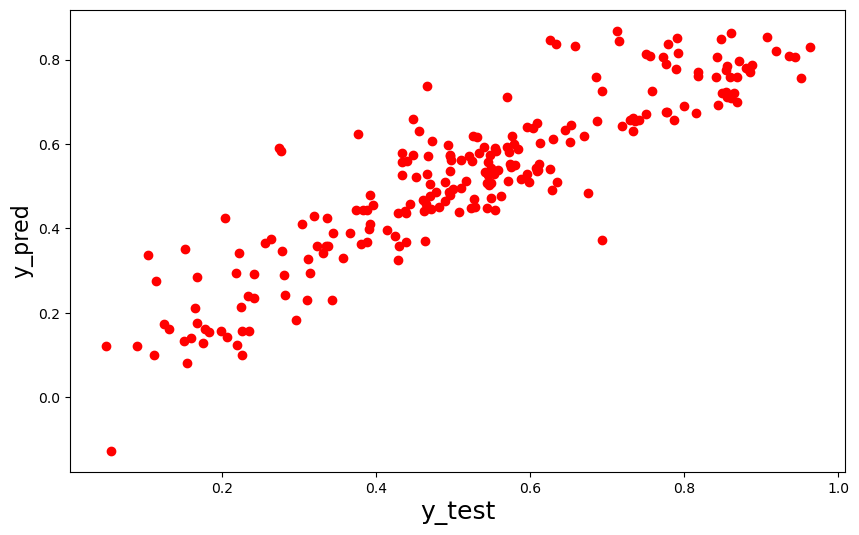

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='Red')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

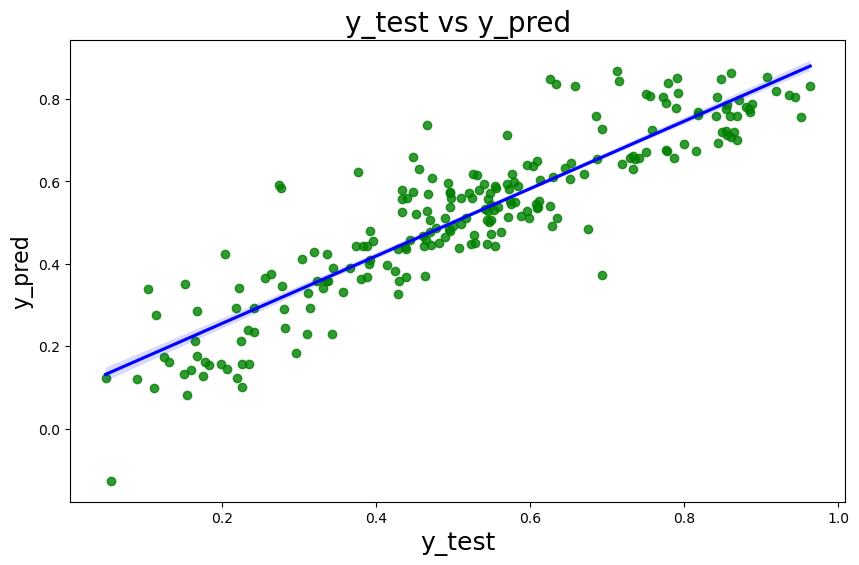

In [101]:
# Visualising the fit on the test set

#Regression plot
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "Green"}, line_kws={"color": "blue"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

**Obs :**

We can see that the equation of our best fitted line is:

count=0.4695×temp+0.0654×September+0.0534×winter+0.2332×Year−0.02993×lightsnow−0.0781×mistcloudy−0.1122×spring-0.1006xholiday



In [ ]:
#Final Result Comparison between Train model and Test:

Train R^2 : 0.817

Train Adjusted R^2 : 0.814

Test R^2: 0.809

Test Adjusted R^2: 0.787

### Interpretation:

* We see that temperature variable is having the highest coefficient 0.4695, which means if the temperature increases by one unit the number of bike rentals increases by 0.4695 units.
* We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

### Business Goals:

* BoomBikes can focus more on Temperature

* BoomBikes can focus more on Summer & Winter season, September month, as they have good influence on bike rentals.

* Holiday, Spring, mistcloudy and lightsnow have negative coefficient and negatively correlated to bike rentals.